<a href="https://colab.research.google.com/github/PrzemyslawSarnacki/NumericalMethods/blob/master/Rational.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np 
import scipy.interpolate  
from numpy.polynomial.polynomial import Polynomial


In [1]:
x_arr = np.array([0, 1, 2, 3], float)
y_arr = np.array([1, 3, -2, -1], float)

NameError: name 'np' is not defined

Implementacja funkcji liczącej współczynniki metody wymiernej

In [3]:
def rational_coefs(x_arr, y_arr):
    n = len(x_arr)
    fi = np.zeros((n,n), float)
    # fill fi[xi] with y_arr (more efficient way)
    for i in range(1, n):
        fi[i, 0] = (x_arr[0] - x_arr[i]) / (y_arr[0] - y_arr[i])

    # add new fi elements based on previous fi elements 
    for j in range(1, n):
        for i in range(j,n):
            fi[i,j] = (x_arr[j] - x_arr[i]) / (fi[j,j-1]-fi[i,j-1])
    # get diagonal from sliced fi 
    a = fi[1:, :-1].diagonal()
    return a

Implementacja wyłącznie na wartościach liczbowych (wynikiem jest tablica zawierająca wyniki w przedziale (od min zbioru do max) )

In [4]:
def rational(x_arr, y_arr):
    # declare interval
    x_interval = np.linspace(x_arr[0], x_arr[-1])
    # declare output array 
    y_result = np.array([], float)
    # get coefficients
    a = rational_coefs(x_arr, y_arr)
    # iterate through interval
    for xp in x_interval:
        # first point
        # yp = y_arr[0]
        yp = 0
        # This time we need to go backwards in order to calculate everything correctly
        for xi, ai in zip(reversed(x_arr[:-1]), reversed(a)):
        # calculate result for certain point
        # p is calculated by reusing previously calculated values
            yp = (xp - xi) / (ai + yp)
        # append to output array
        y_result = np.append(y_result, (yp + y_arr[0]))
    return y_result


Przetestujmy funkcję liczącą współczynniki (jak widzimy wynikiem jest macierz zawierająca współczynniki)

In [5]:
rational_coefs(x_arr, y_arr)

array([ 0.5       , -0.85714286, -7.        ])

Przetestujmy funkcję numeryczną

In [6]:
rational(x_arr, y_arr)

array([  1.        ,   1.02890551,   1.06152909,   1.09843938,
         1.14032721,   1.18804028,   1.24263039,   1.30541872,
         1.37808808,   1.46281563,   1.56246889,   1.68090282,
         1.82342502,   1.99755102,   2.21428571,   2.49041435,
         2.85287138,   3.34777747,   4.06122449,   5.17455493,
         7.14645858,  11.57142857,  30.40816327, -48.75510204,
       -13.58503401,  -7.92034233,  -5.60853432,  -4.35553169,
        -3.57142857,  -3.0358987 ,  -2.64795918,  -2.35480247,
        -2.12612914,  -1.94331066,  -1.79426365,  -1.67080745,
        -1.56720619,  -1.479319  ,  -1.40408163,  -1.33917792,
        -1.28282463,  -1.2336265 ,  -1.19047619,  -1.15248363,
        -1.11892527,  -1.08920682,  -1.06283566,  -1.03939999,
        -1.01855288,  -1.        ])

Sprawdźmy czy obliczenia były poprawne przy pomocy funkcji z biblioteki SciPy

In [9]:
interval = np.linspace(x_arr[0], x_arr[-1])
poly = scipy.interpolate.BarycentricInterpolator(x_arr, y_arr)
poly(interval)

array([ 1.        ,  1.56505368,  2.05812204,  2.48218854,  2.84023664,
        3.13524977,  3.37021139,  3.54810496,  3.67191391,  3.74462171,
        3.76921181,  3.74866765,  3.68597268,  3.58411036,  3.44606414,
        3.27481747,  3.07335379,  2.84465656,  2.59170924,  2.31749526,
        2.02499809,  1.71720117,  1.39708795,  1.06764188,  0.73184642,
        0.39268502,  0.05314112, -0.28380182, -0.61516035, -0.93795102,
       -1.24919039, -1.54589499, -1.82508139, -2.08376612, -2.31896574,
       -2.52769679, -2.70697583, -2.85381941, -2.96524407, -3.03826637,
       -3.06990285, -3.05717006, -2.99708455, -2.88666287, -2.72292157,
       -2.5028772 , -2.22354631, -1.88194545, -1.47509116, -1.        ])

Oraz z funkcją otrzymaną symbolicznie 

In [154]:
def func(x):
    return (2*x**2 - 5*x + 18) /  (-13*x + 18)

In [210]:
func(interval)

array([  1.        ,   1.02890551,   1.06152909,   1.09843938,
         1.14032721,   1.18804028,   1.24263039,   1.30541872,
         1.37808808,   1.46281563,   1.56246889,   1.68090282,
         1.82342502,   1.99755102,   2.21428571,   2.49041435,
         2.85287138,   3.34777747,   4.06122449,   5.17455493,
         7.14645858,  11.57142857,  30.40816327, -48.75510204,
       -13.58503401,  -7.92034233,  -5.60853432,  -4.35553169,
        -3.57142857,  -3.0358987 ,  -2.64795918,  -2.35480247,
        -2.12612914,  -1.94331066,  -1.79426365,  -1.67080745,
        -1.56720619,  -1.479319  ,  -1.40408163,  -1.33917792,
        -1.28282463,  -1.2336265 ,  -1.19047619,  -1.15248363,
        -1.11892527,  -1.08920682,  -1.06283566,  -1.03939999,
        -1.01855288,  -1.        ])

Porównanie powyższych działań na wykresie 

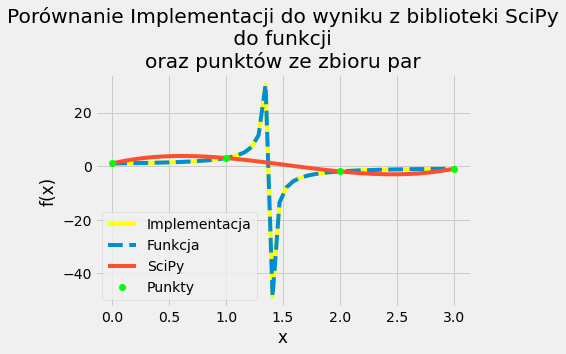

In [213]:
plt.style.use('fivethirtyeight')

plt.plot(interval, rational(x_arr, y_arr), color="yellow")
plt.plot(interval, func(interval), linestyle='dashed')
plt.plot(interval, poly(interval))
plt.plot(x_arr, y_arr, "o", color="lime")
plt.title("Porównanie Implementacji do wyniku z biblioteki SciPy\n do funkcji \noraz punktów ze zbioru par")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend(["Implementacja", "Funkcja", "SciPy", "Punkty"])

Jak widzimy wyniki z funkcją pokrywają się, lecz z implementacją z biblioteki SciPy już nie. Może to być spowodowane użyciem innej metody interpolacyjnej wewnątrz biblioteki 